In [1]:
%reload_ext autoreload
%autoreload 2
%pwd

'/home/dana/development/intradays/Intraday/notebooks'

In [2]:
import sys
sys.path.append('..')
from src.BotTrader import BotTrader
from src.NethFish import NethFish

In [15]:
# IMPORT local.seetings.json to Jupyter Notebook, so all secrets would be available

import os
import json

# Define the path to your local.settings.json file
settings_path = '/home/dana/development/intradays/local.settings.json'

try:
    with open(settings_path, 'r') as file:
        settings = json.load(file)

    # Extract the environment variables from the JSON structure
    # local.settings.json typically stores them under a "Values" key
    env_variables = settings.get('Values', {})  # Adjust key if necessary

    # Set the environment variables in the current Jupyter session
    for key, value in env_variables.items():
        os.environ[key] = str(value)

except Exception as e:
    print(f"Error loading environment variables: {e}")


In [4]:
import csv
import json

# Execute the cURL command and capture the output
import subprocess
import time
import urllib.parse
from abc import ABC, abstractmethod
from datetime import date, datetime, timedelta, timezone
from pathlib import Path
from typing import List, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from powerbot_client import (
    ApiClient,
    Configuration,
    ContractApi,
    MarketApi,
    OrderEntry,
    OrderModify,
    OrdersApi,
    SignalEntry,
    SignalsApi,
    SignalTimeSlice,
    TradesApi,
)
from pytz import FixedOffset  # For creating a fixed offset timezone
from sklearn.linear_model import LinearRegression

# Get trades for NL Fish

In [5]:
delivery_from = "2024-12-03T00:00:00Z"
delivery_to = "2024-12-31T09:00:00Z"

In [472]:
config = {
    "URL": os.environ['POWERBOT_HOST_URL_NORDPOOL'] ,
    "API_KEY_FROM": os.environ['POWERBOT_API_NL_FISH'] ,
    "API_KEY_TO": os.environ['POWERBOT_API_NL_FISH'] ,
    "DELIVERY_AREA": os.environ['NL_NORDPOOL_DELIVERY_AREA'] ,
    "DELIVERY_START_FROM": "2025-01-10T00:00:00Z",
    "DELIVERY_START_TO": "2025-01-14T10:00:00Z",
    "PORTFOLIO_ID_FROM": "P_NL5",
    "PORTFOLIO_ID_TO": "P_NL6",
    "settings": {"mode": "fast"}
}
nlfisk = NethFish(config)
nlfisk.get_trades()

In [ ]:
nlfisk.get_weighted_average_prices()
nlfisk.get_weighted_average_minutes_to_delivery_start()

In [476]:
data_vis = nlfisk.get_profit_loss()
data_vis

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,weighted_minutes_to_delivery_start,quantity_bought,price_bought,quantity_sold,price_sold,profit,pnl,winning,weighted_minutes_to_delivery_start_opener,weighted_minutes_to_delivery_start_closer
0,X587197127,ACTI,nordpool,10YNL----------L,2025-01-09 16:14:37.219000+00:00,2025-01-09 16:14:37.168000+00:00,NX_498570,PH-20250110-11,2025-01-10 09:00:00+00:00,2025-01-10 10:00:00+00:00,...,16.756342,1.0,106.55,1.0,105.060,-1.49,-1.890,False,16.756342,1.999476
1,X587208572,ACTI,nordpool,10YNL----------L,2025-01-09 16:28:57.157000+00:00,2025-01-09 16:28:57.099000+00:00,NX_498612,PH-20250110-16,2025-01-10 14:00:00+00:00,2025-01-10 15:00:00+00:00,...,21.517473,1.0,114.82,1.0,100.000,-14.82,-3.590,False,21.517473,1.952614
2,X587213777,ACTI,nordpool,10YNL----------L,2025-01-09 16:36:15.261000+00:00,2025-01-09 16:36:15.181000+00:00,NX_498630,PH-20250110-18,2025-01-10 16:00:00+00:00,2025-01-10 17:00:00+00:00,...,17.096996,2.0,134.20,2.0,153.925,39.45,23.810,True,17.096996,7.915582
3,X587214651,ACTI,nordpool,10YNL----------L,2025-01-09 16:37:06.452000+00:00,2025-01-09 16:37:06.384000+00:00,NX_498604,PH-20250110-15,2025-01-10 13:00:00+00:00,2025-01-10 14:00:00+00:00,...,20.381560,1.0,98.01,1.0,100.000,1.99,11.230,True,20.381560,1.895416
4,X587420380,ACTI,nordpool,10YNL----------L,2025-01-09 21:43:54.156000+00:00,2025-01-09 21:43:54.099000+00:00,NX_498676,PH-20250110-24,2025-01-10 22:00:00+00:00,2025-01-10 23:00:00+00:00,...,24.268306,1.0,99.57,1.0,108.510,8.94,40.890,True,24.268306,1.999268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,X591103533,ACTI,nordpool,10YNL----------L,2025-01-14 07:08:46.114000+00:00,2025-01-14 07:08:46.059000+00:00,NX_499313,PH-20250114-11,2025-01-14 09:00:00+00:00,2025-01-14 10:00:00+00:00,...,1.611388,1.0,87.86,1.0,95.020,7.16,166.216,True,14.079203,1.611388
153,X591107482,ACTI,nordpool,10YNL----------L,2025-01-14 07:14:38.820000+00:00,2025-01-14 07:14:38.763000+00:00,NX_499313,PH-20250114-11,2025-01-14 09:00:00+00:00,2025-01-14 10:00:00+00:00,...,1.611388,1.0,87.86,1.0,95.020,7.16,166.216,True,14.079203,1.611388
154,X591111973,ACTI,nordpool,10YNL----------L,2025-01-14 07:20:28.441000+00:00,2025-01-14 07:20:28.356000+00:00,NX_499313,PH-20250114-11,2025-01-14 09:00:00+00:00,2025-01-14 10:00:00+00:00,...,1.611388,1.0,87.86,1.0,95.020,7.16,166.216,True,14.079203,1.611388
155,X591115795,ACTI,nordpool,10YNL----------L,2025-01-14 07:26:19.505000+00:00,2025-01-14 07:26:19.456000+00:00,NX_499313,PH-20250114-11,2025-01-14 09:00:00+00:00,2025-01-14 10:00:00+00:00,...,1.611388,1.0,87.86,1.0,95.020,7.16,166.216,True,14.079203,1.611388


In [479]:
def create_scatter_plot(df, x_variable, y_variable, boolean_variable, size_variable, 
                       title="Scatter Plot", 
                       size_scale=20):  # scale factor for point sizes
    """
    Create a scatter plot with customized point colors and sizes.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing all required variables
    x_variable : str
        Name of the column to plot on x-axis
    y_variable : str
        Name of the column to plot on y-axis
    boolean_variable : str
        Name of the column containing boolean values for color coding
    size_variable : str
        Name of the column containing float values for point sizes
    title : str, optional
        Plot title (default: "Scatter Plot")
    size_scale : float, optional
        Scaling factor for point sizes (default: 100)
        
    Returns:
    --------
    fig, ax : tuple
        Matplotlib figure and axis objects
    """
    import matplotlib.pyplot as plt
    
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create scatter plot
    scatter = ax.scatter(x=df[x_variable],
                        y=df[y_variable],
                        c=df[boolean_variable],  # color based on boolean
                        s=df[size_variable] * size_scale,  # size based on float variable
                        alpha=0.6,  # slight transparency
                        cmap='coolwarm')  # color map for boolean values
    
    # Customize plot
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_title(title)
    
    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(),
                       title=boolean_variable)
    ax.add_artist(legend1)
    
    # Add size legend
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6,
                                            num=4, func=lambda s: s/size_scale)
    legend2 = ax.legend(handles, labels,
                       title=size_variable,
                       loc="upper left")
    
    plt.tight_layout()
    return fig, ax

# Example usage:
# df = pd.DataFrame({
#     'x_values': [1, 2, 3, 4, 5],
#     'y_values': [2, 4, 1, 3, 5],
#     'is_category_a': [True, False, True, False, True],
#     'importance': [0.5, 1.0, 0.3, 0.8, 0.6]
# })
# 
# fig, ax = create_scatter_plot(df,
#                              x_variable='x_values',
#                              y_variable='y_values',
#                              boolean_variable='is_category_a',
#                              size_variable='importance',
#                              title='My Scatter Plot')
# plt.show()

In [477]:
data_vis.columns

Index(['trade_id', 'state', 'exchange', 'delivery_area', 'api_timestamp',
       'exec_time', 'contract_id', 'contract_name', 'delivery_start',
       'delivery_end', 'price', 'quantity', 'buy', 'sell', 'buy_portfolio_id',
       'sell_portfolio_id', 'buy_txt', 'sell_txt', 'self_trade',
       'weighted_mean_price', 'diff_hour',
       'weighted_minutes_to_delivery_start', 'quantity_bought', 'price_bought',
       'quantity_sold', 'price_sold', 'profit', 'pnl', 'winning',
       'weighted_minutes_to_delivery_start_opener',
       'weighted_minutes_to_delivery_start_closer'],
      dtype='object')

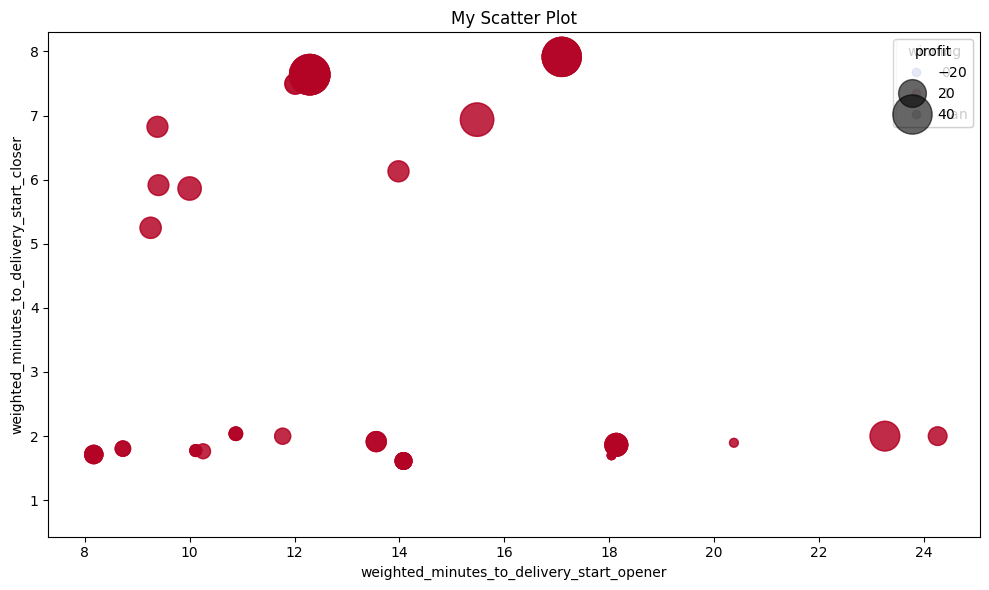

In [480]:
fig, ax = create_scatter_plot(data_vis,
                             x_variable='weighted_minutes_to_delivery_start_opener',
                             y_variable='weighted_minutes_to_delivery_start_closer',
                             boolean_variable='winning',
                             size_variable='profit',
                             title='My Scatter Plot')
plt.show()

In [397]:
test = nlfisk.get_weighted_average_prices(buy_sell='sell', opener_closer='opener')


In [398]:
nlfisk.trades_from_opener.shape

(62, 19)

In [399]:
test.shape

(21, 20)

In [197]:
data_closer = nlfisk.trades_from_closer
data_closer.shape

(95, 19)

In [ ]:
target_date = pd.Timestamp('2025-01-14T00:00:00Z', tz='UTC')
filtered_df2 = data_closer.loc[data_closer['delivery_start'] > target_date]
filtered_df2.shape

In [207]:
data_opener = nlfisk.trades_from_opener
from_hour_date = pd.Timestamp('2025-01-13T8:00:00Z', tz='UTC')
to_hour_date = pd.Timestamp('2025-01-13T9:00:00Z', tz='UTC')
opener_for_the_hour = data_opener.loc[(data_opener['delivery_start'] >= from_hour_date) & (data_opener['delivery_start'] < to_hour_date)]
opener_for_the_hour.head()

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
49,X589622248,ACTI,nordpool,10YNL----------L,2025-01-12 14:43:16.563000+00:00,2025-01-12 14:43:16.504000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,True,None,P_NL5,None,Regular BUY --BUY--Hour:10--Ref:153.9--Opp:171.0,None,False,17.278749,17
44,X589821976,ACTI,nordpool,10YNL----------L,2025-01-12 21:16:15.898000+00:00,2025-01-12 21:16:15.854000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Opportunity BUY --BUY--Hour:10--Ref:153.9--Opp...,False,10.728929,10
42,X589888114,ACTI,nordpool,10YNL----------L,2025-01-12 23:08:12.787000+00:00,2025-01-12 23:08:12.733000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:10--Ref:188.1--Opp:1...,False,8.863130,8


In [204]:
data_opener.loc[:,'diff_hour'] = (data_opener.loc[:,'delivery_start'] - data_opener.loc[:,'exec_time']).dt.total_seconds() / 60  / 60
data_opener.loc[:, 'diff_hour_floor'] = data_opener['diff_hour'].apply(np.floor).apply(int)

In [200]:
# time before
# compute the minutes between delivery_start - exec_time
data_closer.loc[:,'diff_hour'] = (data_closer.loc[:,'delivery_start'] - data_closer.loc[:,'exec_time']).dt.total_seconds() / 60  / 60
data_closer.loc[:, 'diff_hour_floor'] = data_closer['diff_hour'].apply(np.floor).apply(int)

<Axes: >

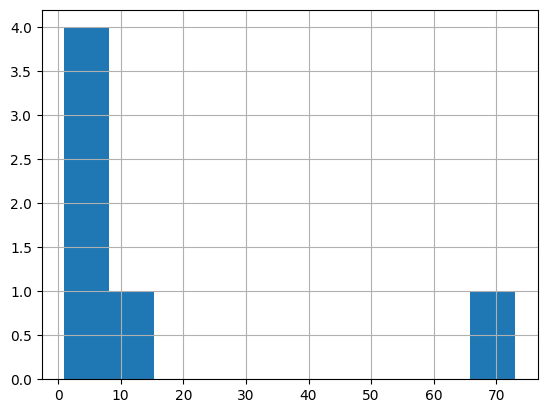

In [372]:
data_closer['diff_hour_floor'].value_counts().hist()

<Axes: >

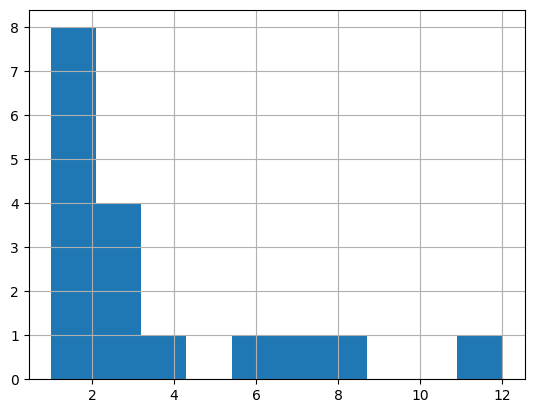

In [370]:
data_opener['diff_hour_floor'].value_counts().hist()

In [210]:
data_opener[data_opener['contract_id'] == 'NX_499119']

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
49,X589622248,ACTI,nordpool,10YNL----------L,2025-01-12 14:43:16.563000+00:00,2025-01-12 14:43:16.504000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,True,None,P_NL5,None,Regular BUY --BUY--Hour:10--Ref:153.9--Opp:171.0,None,False,17.278749,17
44,X589821976,ACTI,nordpool,10YNL----------L,2025-01-12 21:16:15.898000+00:00,2025-01-12 21:16:15.854000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Opportunity BUY --BUY--Hour:10--Ref:153.9--Opp...,False,10.728929,10
42,X589888114,ACTI,nordpool,10YNL----------L,2025-01-12 23:08:12.787000+00:00,2025-01-12 23:08:12.733000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:10--Ref:188.1--Opp:1...,False,8.863130,8


In [209]:
data_opener[data_opener['contract_id'] == 'NX_499119']
data_closer[data_closer['contract_id'] == 'NX_499119']

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
79,X589922528,ACTI,nordpool,10YNL----------L,2025-01-13 00:19:05.292000+00:00,2025-01-13 00:19:05.095000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,0.7,True,None,P_NL6,None,MaxOrgOrder --MinToDelivery480,None,False,7.681918,7
78,X589924168,ACTI,nordpool,10YNL----------L,2025-01-13 00:23:19.808000+00:00,2025-01-13 00:23:19.750000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,0.1,True,None,P_NL6,None,MaxOrgOrder --MinToDelivery480,None,False,7.611181,7
77,X589926627,ACTI,nordpool,10YNL----------L,2025-01-13 00:30:03.310000+00:00,2025-01-13 00:30:03.174000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,0.2,True,None,P_NL6,None,MaxOrgOrder --MinToDelivery480,None,False,7.499118,7


* 2 MW sold, 1 MW bought - this was profitable? -> check performance of position opener against our own trades
    * selling prices buying prices how to match them meaningfully?

* average hour weighted by volume for position opener and closer and then see where the profit comes

In [ ]:
# Average sell and buy prices per contract_id

In [220]:
data_closer.columns

Index(['trade_id', 'state', 'exchange', 'delivery_area', 'api_timestamp',
       'exec_time', 'contract_id', 'contract_name', 'delivery_start',
       'delivery_end', 'price', 'quantity', 'buy', 'sell', 'buy_portfolio_id',
       'sell_portfolio_id', 'buy_txt', 'sell_txt', 'self_trade', 'diff_hour',
       'diff_hour_floor'],
      dtype='object')

In [287]:
data_opener.groupby(['contract_id', 'buy'])['price'].mean()
tablebuy = data_opener.groupby(['contract_id', 'buy'])['quantity'].sum()

# data_closer[(data_closer['contract_id'] == 'NX_499119') & (data_closer['buy'] == True)]

In [244]:
tablebuy = pd.DataFrame(tablebuy)
tablebuy

,,quantity
contract_id,buy,
NX_498570,True,1.0
NX_498578,True,1.0
NX_498586,True,1.0
NX_498596,True,1.0
NX_498604,True,1.0
NX_498612,True,1.0
NX_498623,True,1.0
NX_498630,True,1.0
NX_498653,True,1.0


In [286]:
data_opener.groupby(['contract_id', 'sell'])['price'].mean()
tablesell = data_opener.groupby(['contract_id', 'sell'])['quantity'].sum()
tablesell = pd.DataFrame(tablesell)
tablesell

,,quantity
contract_id,sell,
NX_498517,True,1.0
NX_498524,True,1.0
NX_498531,True,1.0
NX_498538,True,1.0
NX_498630,True,2.0
NX_498763,True,1.0
NX_498905,True,1.0
NX_498922,True,1.0
NX_498929,True,1.0


In [292]:
opener_performance = pd.merge(tablesell, tablebuy, on='contract_id', how='outer')
equal_openers = opener_performance[opener_performance['quantity_x'] == opener_performance['quantity_y']]
equal_openers = equal_openers.reset_index().rename(columns={'index': 'contract_id'})
opener_only = data_opener[data_opener['contract_id'].isin(equal_openers['contract_id'])]
opener_only.shape


(10, 21)

In [289]:
data_opener[data_opener['contract_id'] == 'NX_498929']

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
38,X588862915,ACTI,nordpool,10YNL----------L,2025-01-11 14:56:55.737000+00:00,2025-01-11 14:56:55.703000+00:00,NX_498929,PH-20250112-10,2025-01-12 08:00:00+00:00,2025-01-12 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:10--Ref:132.08--Opp:...,False,17.051194,17
30,X589061080,ACTI,nordpool,10YNL----------L,2025-01-11 21:20:22.522000+00:00,2025-01-11 21:20:13.230000+00:00,NX_498929,PH-20250112-10,2025-01-12 08:00:00+00:00,2025-01-12 09:00:00+00:00,...,1.0,True,None,P_NL5,None,Opportunity SELL --SELL--Hour:10--Ref:132.08--...,None,False,10.662992,10


<Axes: xlabel='diff_hour_floor', ylabel='price_diff'>

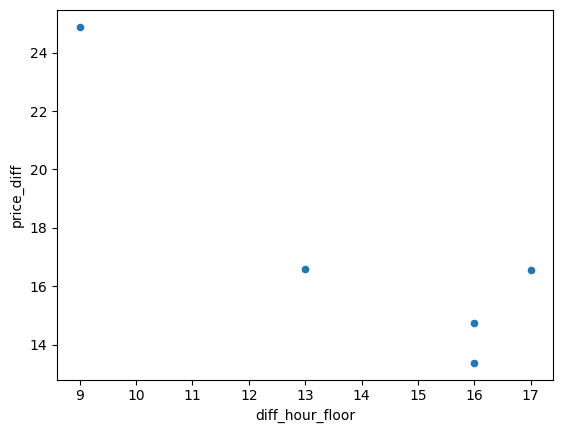

In [303]:
small_opener = opener_only.sort_values(by=['contract_id','buy', 'delivery_start'])[['contract_id','buy','delivery_start', 'price', 'diff_hour_floor']]
small_opener['price_diff'] = small_opener.groupby('contract_id')['price'].diff()
small_opener.plot(x='diff_hour_floor', y='price_diff', kind='scatter')

In [365]:
data_opener.loc[:,'diff_minutes'] = (data_opener.loc[:,'delivery_start'] - data_opener.loc[:,'exec_time']).dt.total_seconds() / 60

data_closer.loc[:,'diff_minutes'] = (data_closer.loc[:,'delivery_start'] - data_closer.loc[:,'exec_time']).dt.total_seconds() / 60

opener_grouped_weighted_mean = (
    data_opener.groupby('contract_id')
    .apply(lambda x: np.average(x['diff_minutes'], weights=x['quantity']), include_groups=False)
)
closer_grouped_weighted_mean = (
    data_closer.groupby('contract_id')
    .apply(lambda x: np.average(x['diff_minutes'], weights=x['quantity']), include_groups=False)
)
avg_hours_opener = opener_grouped_weighted_mean.reset_index().rename(columns={0: 'avg_hours_opener'})
avg_hours_closer = closer_grouped_weighted_mean.reset_index().rename(columns={0: 'avg_hours_closer'})
avg_hours = pd.merge(avg_hours_opener, avg_hours_closer, on='contract_id', how='outer')
dates_of_trades = nlfisk.trades[nlfisk.trades['contract_id'].isin(avg_hours['contract_id'])][['contract_id', 'delivery_start']]
contracts_to_analyze = nlfisk.trades[nlfisk.trades['contract_id'].isin(avg_hours['contract_id'])]

# get dates of trades
dates_of_trades = nlfisk.trades[nlfisk.trades['contract_id'].isin(avg_hours['contract_id'])][['contract_id', 'delivery_start']]
dates_of_trades['delivery_start_date'] = dates_of_trades['delivery_start'].dt.day
dates_of_trades = dates_of_trades[['contract_id', 'delivery_start_date']]

# get sum of trades
bought_amount = contracts_to_analyze.groupby(['contract_id', 'buy'])['quantity'].sum()
sold_amount = contracts_to_analyze.groupby(['contract_id', 'sell'])['quantity'].sum()
buy_price_avg = contracts_to_analyze.groupby(['contract_id', 'buy'])['price'].mean()
sell_price_avg = contracts_to_analyze.groupby(['contract_id', 'sell'])['price'].mean()

# compute profit and loss bought amount times buy price - sold amount times sell price
bought_amount = pd.DataFrame(bought_amount)
sold_amount = pd.DataFrame(sold_amount)
buy_price_avg = pd.DataFrame(buy_price_avg)
sell_price_avg = pd.DataFrame(sell_price_avg)
buy_sell = pd.merge(bought_amount, sold_amount, on='contract_id', how='outer')
buy_sell.rename(columns={'quantity_x': 'quantity_bought', 'quantity_y': 'quantity_sold'}, inplace=True)
buy_sell = pd.merge(buy_sell, buy_price_avg, on='contract_id', how='outer')
buy_sell.rename(columns={'price': 'price_bought'}, inplace=True)
buy_sell = pd.merge(buy_sell, sell_price_avg, on='contract_id', how='outer')
buy_sell.rename(columns={'price': 'price_sold'}, inplace=True)
buy_sell = buy_sell.fillna(0)
buy_sell['profit'] = buy_sell['quantity_sold'] * buy_sell['price_sold'] - buy_sell['quantity_bought'] * buy_sell['price_bought']
buy_sell['pnl'] = buy_sell['profit'].cumsum()

with_hours = pd.merge(buy_sell, avg_hours, on='contract_id', how='left')
with_hours = pd.merge(with_hours, dates_of_trades, on='contract_id', how='left')



<Axes: xlabel='delivery_start_date', ylabel='profit'>

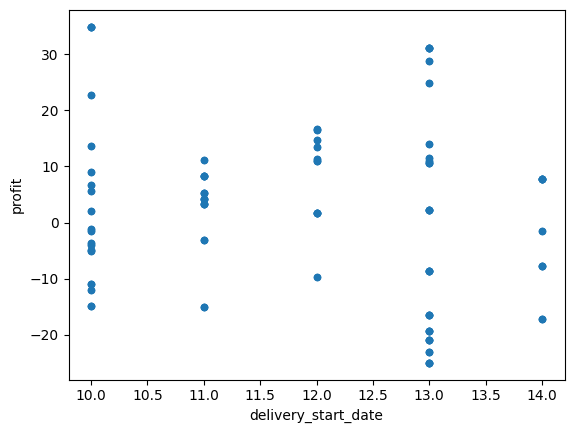

In [356]:
with_hours.plot(x='delivery_start_date', y='profit', kind='scatter')

 # with_hours

<Axes: xlabel='avg_hours_opener', ylabel='profit'>

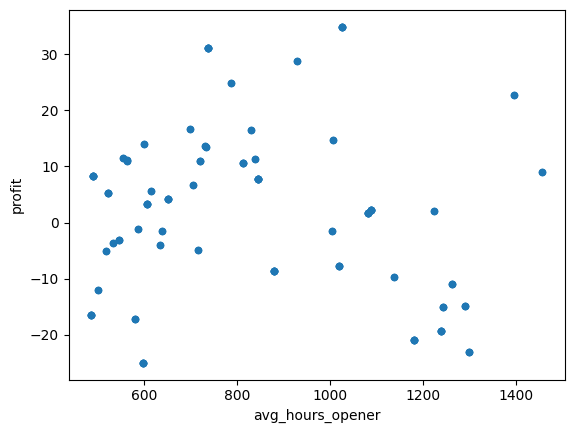

In [361]:
with_hours.plot(x='avg_hours_opener', y='profit', kind='scatter')

<Axes: >

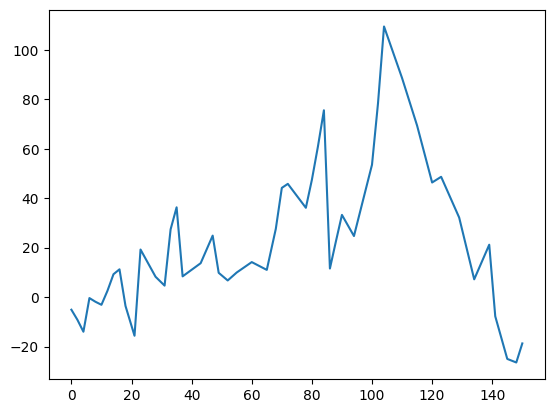

In [369]:
#with_hours.groupby('delivery_start_date')['profit'].cumsum().plot()
with_hours.drop_duplicates().groupby('delivery_start_date')['profit'].cumsum().plot()